Solucionário Desafio IEEE Computational Intelligence Society

Participante: Alberto Côrtes Cavalcante

# **Instrução de Avaliação**

Este exame tem como objetivo avaliar suas competências em inteligência artificial e
ciência de dados, abrangendo conceitos de Machine Learning, Deep Learning,
Estatística e Processamento de Dados.

**Observações**

- Todas as soluções devem ser implementadas em Python, utilizando bibliotecas
como Pandas, NumPy, Matplotlib, Seaborn e Scikit-Learn.

- As respostas devem ser organizadas em um notebook do Google Colab (.ipynb).
- O notebook deve conter todas as soluções, explicações e visualizações
necessárias.
- Todas as células do código devem ser executadas e os outputs devem estar
visíveis no arquivo enviado. Respostas sem os resultados das execuções não
serão consideradas.
- O envio de arquivos incompletos ou que não sigam as diretrizes estabelecidas
pode resultar em penalizações na pontuação final.
Recomendação: Utilize os recursos do Google Colab, como células de texto para
documentar suas respostas e gráficos interativos para melhorar a visualização dos dados.

**Solucionário**

Inicialmente os códigos abaixo tem como a finalidade preparar o ambiente para responder as quesõtes
- importar as bibliotecas a serem usadas em todo o código.
- importar os dados da planilha, neste caso eu optei por subir no meu github (https://raw.githubusercontent.com/oalbertocavalcante/desafio-ieee/main/diabetes.csv) para entaõ fazer um request via código;
-

# Importação de bibliotecas e dados:

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

**Bibliotecas Usadas:**

- pandas (pd)

Ferramenta principal para manipulação de dados (como tabelas do Excel)

Por que usei: Lê, filtra, agrupa e transforma dados facilmente os DataFrames

- numpy (np)

Cálculos numéricos eficientes com arrays multidimensionais

Por que usei: Base para operações matemáticas rápidas, usada por outras bibliotecas

- matplotlib.pyplot (plt)

Gera gráficos básicos (linhas, barras, dispersão)

Por que usei: Flexível para visualizações personalizadas

seaborn (sns)

Cria gráficos estatísticos mais atraentes e informativos

Por que usei: Simplifica a visualização de padrões em dados

- Estatística e Pré-processamento
scipy.stats

Funções estatísticas (testes de hipóteses, distribuições)

Por que usei: Para validar suposições dos dados (ex.: normalidade, correlações)

- StandardScaler e MinMaxScaler (do sklearn)

Normalizam/padronizam dados (importante para muitos algoritmos)

Por que usei:

- StandardScaler:

Transforma dados para média=0 e desvio padrão=1

- MinMaxScaler:

Redimensiona dados para um intervalo (ex.: 0 a 1)

- SimpleImputer

Preenche valores faltantes (ex.: com média, mediana)

Por que usei: Dados incompletos são comuns e prejudicam modelos

- SelectKBest e f_classif

Seleciona as melhores features (variáveis) com base em testes estatísticos

Por que usei: Reduz dimensionalidade e melhora desempenho do modelo

- Bibliotecas para Machine Learning train_test_split

Divide os dados em conjuntos de treino e teste

Por que usei: Avaliar modelos em dados não vistos durante o treino

- Modelos de Classificação

DecisionTreeClassifier: Árvore de decisão (fácil interpretação)

LogisticRegression: Regressão logística (para problemas binários/multiclasse)

RandomForestClassifier: Ensemble de árvores

XGBClassifier: XGBoost

Por que usei: possui vantagens para diferentes tipos de dados

- Avaliação de Modelos

accuracy_score: Calcula a acurácia das previsões

classification_report: Mostra precisão, recall, F1-score

confusion_matrix: Visualiza erros e acertos por classe

In [ ]:
# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

In [ ]:
# Carregar os dados
url = "https://raw.githubusercontent.com/oalbertocavalcante/desafio-ieee/main/diabetes.csv"
diabetes = pd.read_csv(url)

Por meio dessas funções é possível colecar as primeiras informações do arquivo
cvs, a ideia aqui é visualizar as linhas e fazer uma estatística descritiva simples. Todos esses comandos juntos dão uma visão geral rápida dos dados antes de você partir pra parte das questões.

In [ ]:
diabetes.head()
diabetes.info()
diabetes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   764 non-null    float64
 2   BloodPressure             748 non-null    float64
 3   SkinThickness             758 non-null    float64
 4   Insulin                   765 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,764.000000,748.000000,758.000000,765.000000,757.000000,767.000000,768.000000,768.000000
mean,3.845052,120.821990,68.950535,20.679420,79.594771,32.001585,428.227575,33.240885,0.348958
std,3.369578,32.004746,19.307876,15.960118,115.340132,7.787967,340.707768,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,205.000000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,25.000000,32.000000,337.000000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.000000,36.500000,592.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000,1.000000


Explicação e breve análise:

- o info() mostrou que temos uma tabela com 768 pacientes (linhas) e 9 informações diferentes (colunas). A maioria são números decimais, como glicose e pressão arterial, e alguns são números inteiro, como número de gravidez e idade. Ele também mostra que tem alguns dados faltando em quase todas as colunas - por exemplo, a pressão arterial tem 20 valores faltantes e o BMI (índice de massa corporal) tem 11.

- o describe() trouxe um resumo numérico. A média de glicose dos pacientes é 120,82, mas tem gente com 0 (o que acredito eu que seja um erro na coleta/tratamento dos dados quando se faz um levantamento de dados assim) e outros com 199. A idade média é 33 anos, variando de 21 até 81 anos. Metade das pacientes já tiveram até 3 gravidezes, mas tem casos "estranhos" de até 17. O DiabetesPedigreeFunction (que mede histórico familiar) tem uma variação enorme, indo de 0,1 até 2329.

Conclusão inicial:
A partir das informações acima temos dados faltantes que precisam ser tratados

- Existem valores estranhos como "0" em glicose (que não faz sentido do ponto de vistamédico)

- A maioria das pacientes tem entre 24 e 41 anos

- Cerca de 35% delas foram diagnosticadas com diabetes (coluna Outcome)

- Há uma variação nos valores, especialmente em Insulin e DiabetesPedigreeFunction

# Questão 1
Existem valores faltantes ou outliers no dataset? Se sim, como você abordaria o
tratamento dessas inconsistências? Explique as técnicas que utilizaria para lidar com essas questões.

In [ ]:
#Verificar valores faltantes
print("Valores faltantes por coluna:")
print(diabetes.isnull().sum())

Valores faltantes por coluna:
Pregnancies                  0
Glucose                      4
BloodPressure               20
SkinThickness               10
Insulin                      3
BMI                         11
DiabetesPedigreeFunction     1
Age                          0
Outcome                      0
dtype: int64


In [ ]:
# Identificar outliers usando IQR
def detect_outliers(df, columns):
    outlier_indices = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    return outlier_indices

# Colunas numéricas para análise de outliers
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

outliers = detect_outliers(diabetes, numeric_cols)
print(f"Número de outliers detectados: {len(outliers)}")

Número de outliers detectados: 145


In [ ]:
# Função para tratamento robusto de outliers
def treat_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Substituir outliers pelos limites
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
        df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

    return df_clean

# Colunas numéricas para análise
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Aplicar tratamento
diabetes_clean = treat_outliers(diabetes, numeric_cols)

# Preencher valores faltantes com a mediana
diabetes_clean = diabetes_clean.fillna(diabetes_clean.median())

# Verificar se ainda há valores faltantes
print("\nValores faltantes após tratamento final:")
print(diabetes_clean.isnull().sum())


Valores faltantes após tratamento final:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Primeira conclusão:

---
Lidando com os outliers, o código calcula o intervalo aceitável de cada coluna numérica, usando os quartis (Q1, Q3) e o IQR (que é a diferença entre eles).se algum valor está muito abaixo ou muito acima desse intervalo (mais de 1.5x o IQR), ele é ajustado pro limite mais próximo.
ou seja, se a glicose normal vai de 70 a 180 e aparece um 200, esse valor é trocado por 180. Assim se evita que valores fora da curva atrapalhem as análises.

Dados que tão faltando (NaN): Todos os valores faltantes foram preenchidos com a mediana de cada coluna. A mediana é basicamente o número do meio quando os dados tão em ordem. Isso é bom porque a mediana não é puxada pra cima ou pra baixo por valores muito altos ou muito baixos, então é bem mais "estável".

Sobre a Questão 1 (baseado nos resultados do código):
Sim, o dataset tinha valores faltantes e outliers:

Tinha valores faltando em várias colunas, tipo Glucose (4 faltando), BloodPressure (20), entre outras. Foi detectado 145 outliers.

Como foi tratado:

Os valores faltantes foram todos preenchidos com a mediana. Depois disso, não ficou mais nenhum NaN no dataset.

Os 145 outliers foram ajustados pros limites aceitáveis, assim nenhum dado ficou faltando mais.

# Questão 2
Como as principais variáveis (Glucose, BloodPressure, BMI, etc.) estão
distribuídas? Utilize histogramas e boxplots para representar visualmente essas
distribuições e analise as características de cada uma.

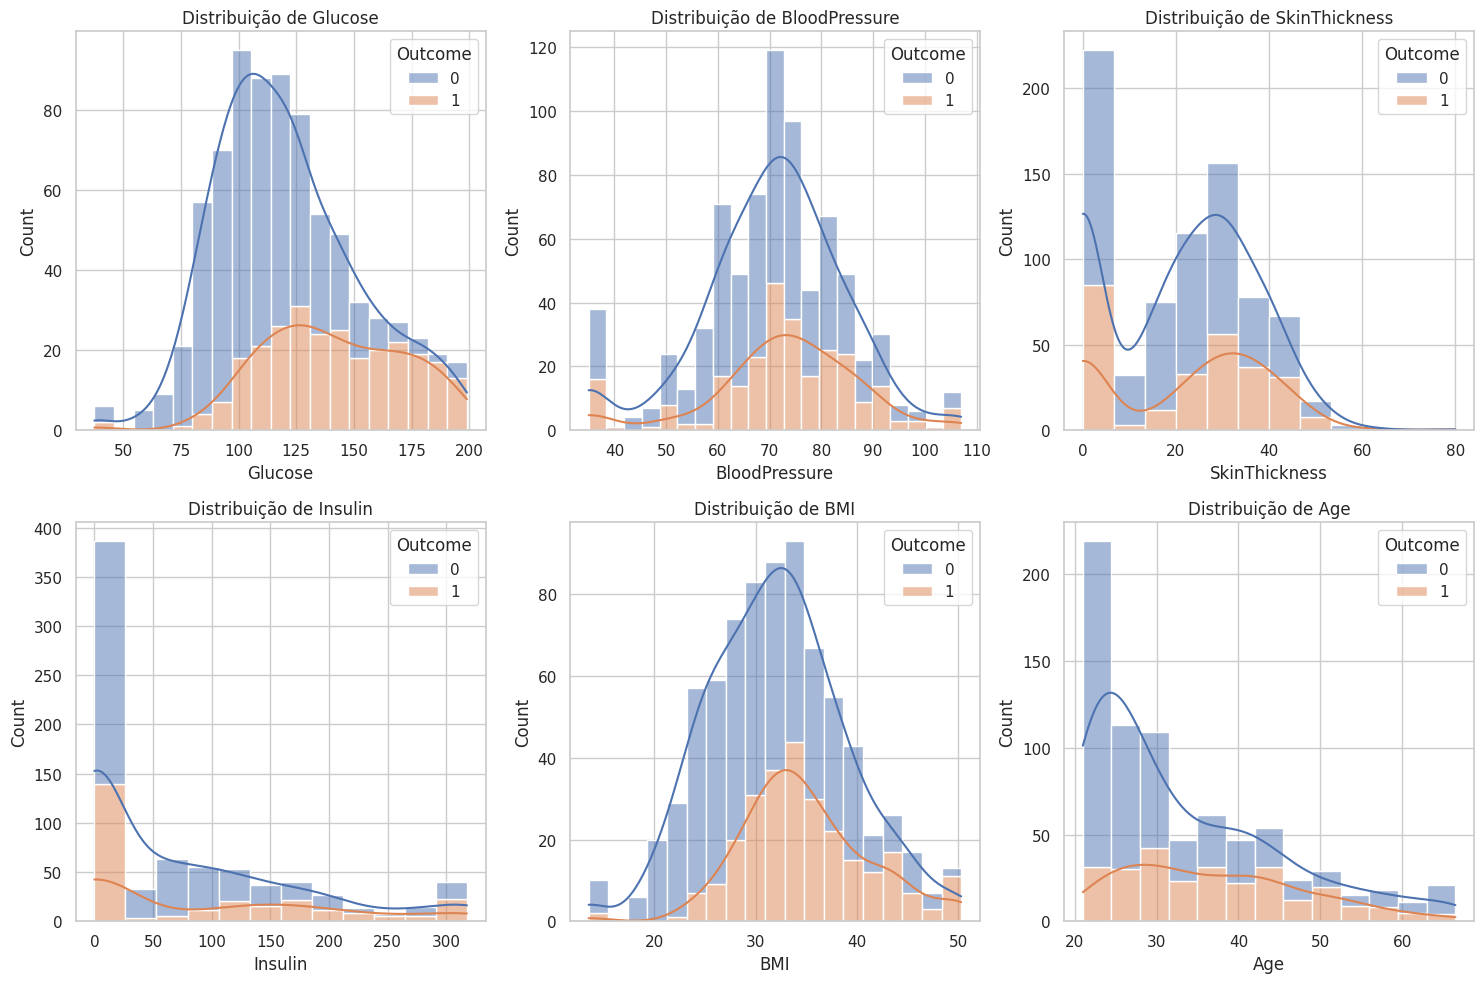

In [ ]:
# Histogramas das variáveis principais
main_vars = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

plt.figure(figsize=(15, 10))
for i, var in enumerate(main_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=diabetes_clean, x=var, kde=True, hue='Outcome', multiple='stack')
    plt.title(f'Distribuição de {var}')
plt.tight_layout()
plt.show()

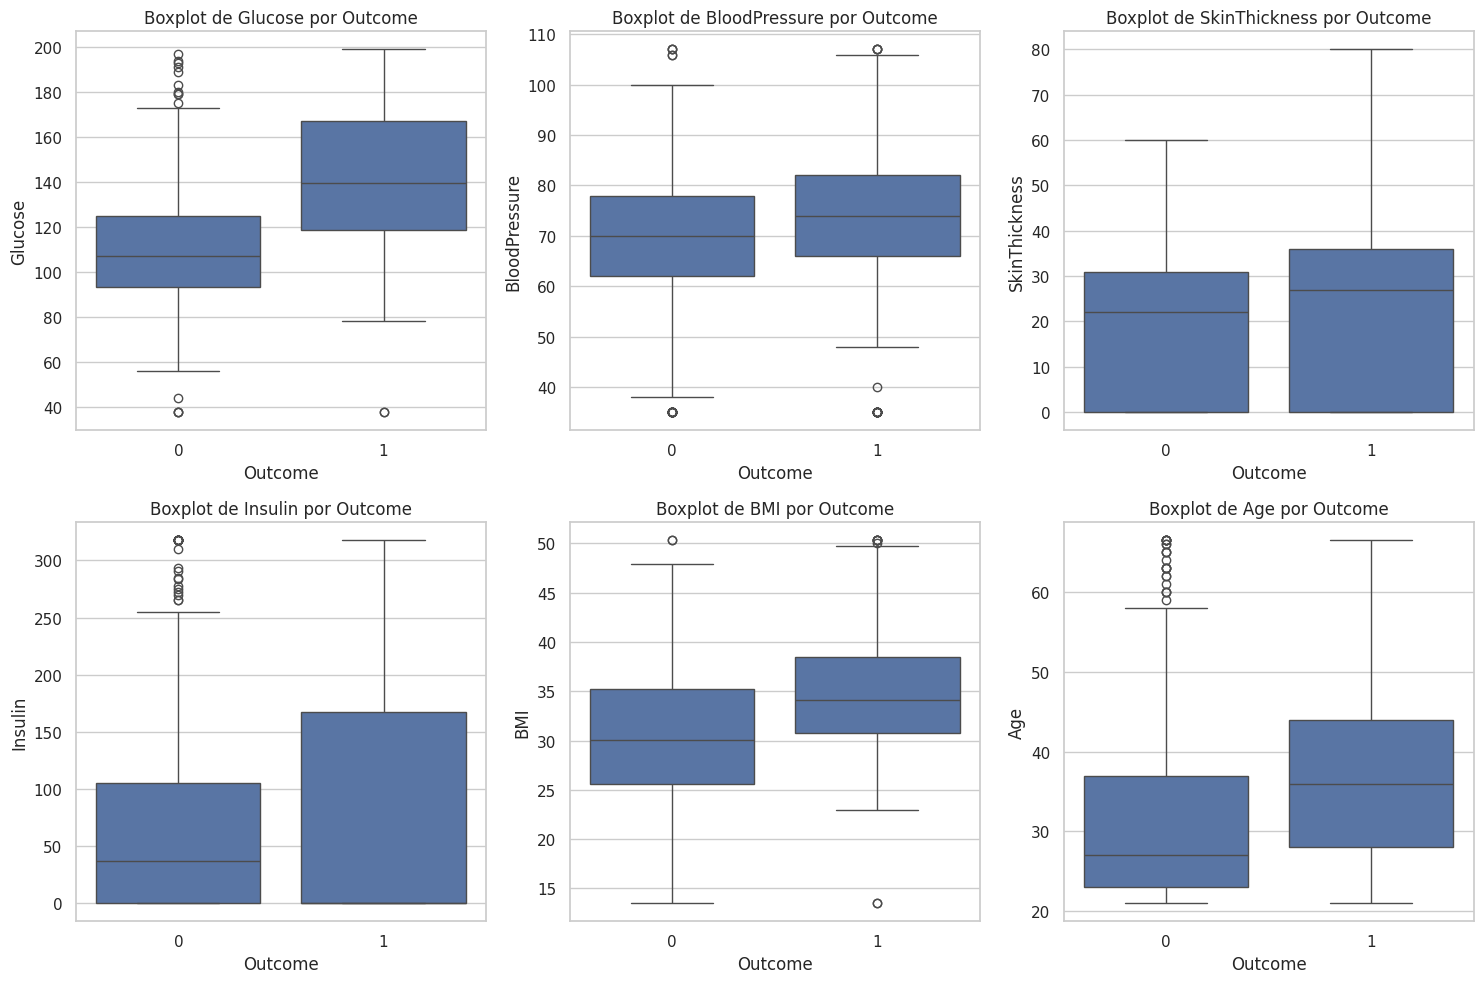

In [ ]:
# Boxplots das variáveis principais
plt.figure(figsize=(15, 10))
for i, var in enumerate(main_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=diabetes_clean, x='Outcome', y=var)
    plt.title(f'Boxplot de {var} por Outcome')
plt.tight_layout()
plt.show()

**Segunda conclusão:**

---

Aqui foi analisado como que foi distribuido as principais variáveis do dataset de diabetes os dados das colunas usando histogramas e boxplots. Os gráficos estão separados por "Outcomes" (0 = não diabético, 1 = diabético) pra ver se tem diferença entre os grupos.

- Para o Histograma:

O código plota um histograma pra cada variável com KDE (linha de densidade) e separa por Outcome.

O que a gente observa:

1.   Glucose

Os não diabéticos (Outcome=0) tem um pico em torno de 100-120 mg/dL, que é considerado normal.

Já os diabéticos (Outcome=1) tem uma curva mais espalhada, com valores acima de 140 mg/dL (glicose alta).

2.   BloodPressure (Pressão Sanguínea):

Os dois grupos tem uma distribuição parecida, mas os diabéticos tem uma leve tendência pra pressão mais alta (acima de 80 mmHg).

4. SkinThickness (Espessura da Pele):

Tem uns valores zerados que podem ser missing data (dados faltando).
Os diabéticos tendem a ter valores mais altos (acima de 30 mm).

5. Insulin (Insulina):

Distribuição bem desigual, com muitos valores baixos e alguns extremamente altos (possíveis outliers).

Diabéticos tem mais casos com insulinas elevadas.

6. BMI (Índice de Massa Corporal):

Pessoas com diabetes tão mais concentradas em BMI > 30 (obesidade).

7. Age (Idade):

Diabéticos tão mais presentes em idades acima de 40 anos.

- Para os bloxpot

O código mostra boxplots pra cada variável, separando por Outcome. O que dá pra notar:

1. Glucose:

A mediana dos diabéticos (Outcome=1) é MUITO mais alta que dos não diabéticos.
Tem uns outliers em ambos os grupos, mas mais extremos nos diabéticos.

2. BloodPressure:

Diferença menos gritante, mas diabéticos tem pressão um pouco mais alta (caixa do boxplot mais pro alto).

3. SkinThickness:

Valores zerados tão distorcendo a análise (provavelmente dados faltantes).
Diabéticos tem medianas maiores.

4. Insulin:

MUITA variação! Os diabéticos tem uma faixa interquartil (IQR) mais larga, com muitos outliers.

5. BMI:

Claramente maior nos diabéticos (mediana acima de 30).

6. Age/Idade:

Pessoas com diabetes são em média mais velhas (mediana perto de 40 anos).



# Questão 3:

Existe uma correlação entre a idade dos indivíduos e a presença de diabetes?
Realize uma análise estatística (como teste de correlação) e utilize gráficos (como
scatter plot ou boxplot) para ilustrar essa relação.

O código abaixo calcula a matriz de correlação entre idade (Age) e diagnóstico de diabetes

In [ ]:
# Teste de correlação entre idade e diabetes
corr_age_outcome = diabetes_clean[['Age', 'Outcome']].corr()
print("Correlação entre idade e diabetes:")
print(corr_age_outcome)

Correlação entre idade e diabetes:
              Age   Outcome
Age      1.000000  0.242702
Outcome  0.242702  1.000000


**Interpretação:**

A correlação entre idade e diabetes é 0.24, indicando uma relação positiva fraca a moderada.

Isso significa que, em geral, indivíduos mais velhos tendem a ter maior probabilidade de diabetes, mas a idade não é o único fator determinante (já que a correlação está longe de 1)

O boxplot compara a distribuição da idade entre diabéticos (Outcome=1) e não diabéticos (Outcome=0)

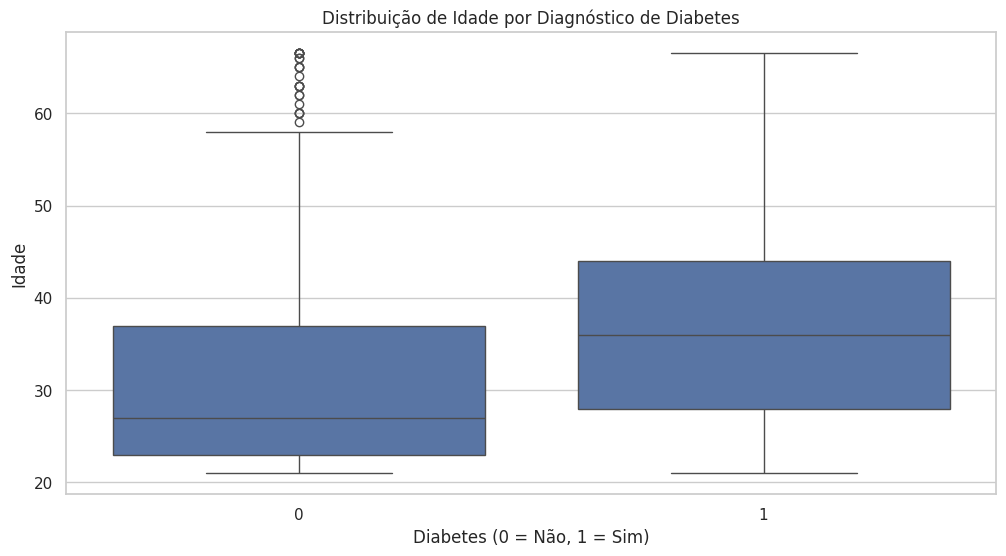

In [ ]:
# Visualização da relação entre idade e diabetes
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_clean, x='Outcome', y='Age')
plt.title('Distribuição de Idade por Diagnóstico de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()

**Terceira conclusão:**

---

Existe sim uma relação entre idade e diabetes, porém não extremamente forte (correlação de 0.24). O boxplot confirma que diabéticos tendem a ser mais velhos, mas há muitas exceções (solapando a ideia de que idade é o único fator relevante)

# Questão 4

Quais variáveis apresentam maior correlação com a presença de diabetes? Quais
variáveis parecem ser as mais indicativas da presença de diabetes

O heatmap gerado pelo código abaixo mostra as correlações entre todas as variáveis:

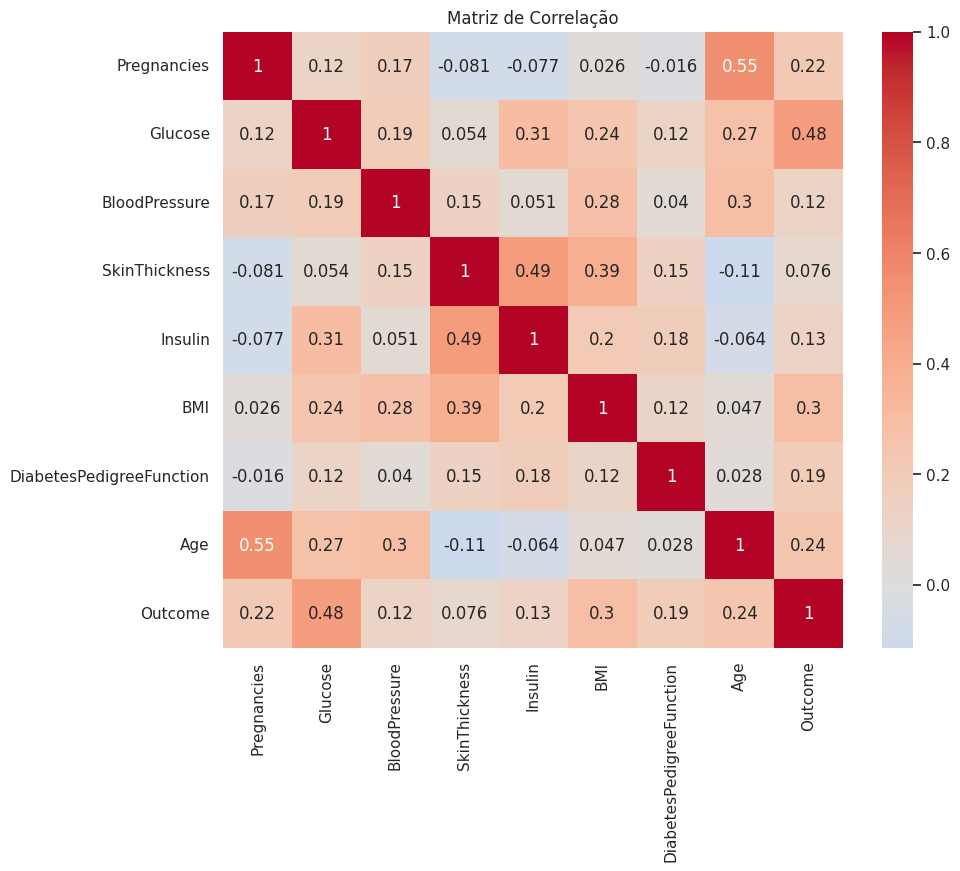

In [ ]:
# Matriz de correlação
corr_matrix = diabetes_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

Cores vermelhas: Correlação positiva (quanto mais intenso, mais forte).

Cores com tons de azuis: Correlação negativa ou neutra.

In [ ]:
# Correlação com Outcome
corr_with_outcome = corr_matrix['Outcome'].sort_values(ascending=False)
print("Correlação com Outcome:")
print(corr_with_outcome)

Correlação com Outcome:
Outcome                     1.000000
Glucose                     0.479152
BMI                         0.297906
Age                         0.242702
Pregnancies                 0.220392
DiabetesPedigreeFunction    0.187929
Insulin                     0.128126
BloodPressure               0.118515
SkinThickness               0.075923
Name: Outcome, dtype: float64


Analisando a tabela, temos que:

1.   Glucose (0.48)

Correlação mais forte: Níveis elevados de glicose são o principal sinal de diabetes.

possível justificativa: Valores acima de 126 mg/dL em jejum são critério diagnóstico.

2.   BMI (0.30)

Obesidade (BMI ≥ 30) está claramente associada ao diabetes.

Gordura corporal influencia a resistência à insulina.

3. Age (0.25)

Idade avançada é um fator de risco conhecido (metabolismo menos eficiente).

**Quarta conclusão:**

---

Analisndo as justificativas acima, podemos identificar três variáveis principais que tem correlação com o diabetes, são elas: Clucose (Glicose), BMI (Índice de Massa Corporal), Age (Idade);

Correlações moderadas foram: Pregnancies (Gravidez) e DiabetesPedigreeFunction (histórico familiar);

Variávei com pouca correlaçaõ: Insulin (Insulina), BloodPressure (Presão Arterial), SkinThickness (Espessura da Pele)

# Questão 5:
Existe uma relação entre o IMC dos pacientes e o diagnóstico de diabetes?
Compare os valores médios de IMC entre os grupos com e sem diabetes, e
analise a diferença estatisticamente.

In [ ]:
# Comparação de IMC entre grupos
bmi_diabetes = diabetes_clean[diabetes_clean['Outcome'] == 1]['BMI']
bmi_no_diabetes = diabetes_clean[diabetes_clean['Outcome'] == 0]['BMI']

print(f"\nMédia de IMC - Com diabetes: {bmi_diabetes.mean():.2f}")
print(f"Média de IMC - Sem diabetes: {bmi_no_diabetes.mean():.2f}")

t_stat, p_value = stats.ttest_ind(bmi_diabetes, bmi_no_diabetes)
print(f"\nTeste t: estatística = {t_stat:.2f}, p-valor = {p_value:.4f}")


Média de IMC - Com diabetes: 34.93
Média de IMC - Sem diabetes: 30.61

Teste t: estatística = 8.64, p-valor = 0.0000


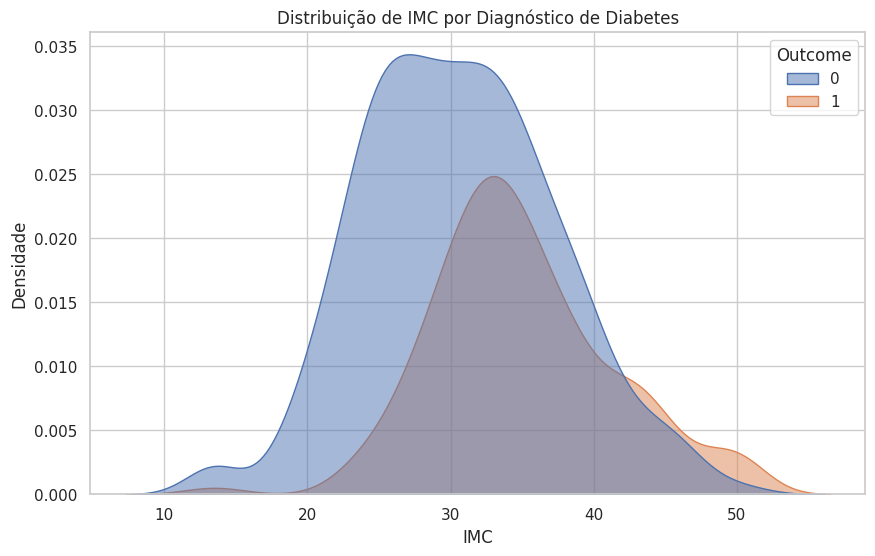

In [ ]:
# Visualização
plt.figure(figsize=(10, 6))
sns.kdeplot(data=diabetes_clean, x='BMI', hue='Outcome', fill=True, alpha=0.5)
plt.title('Distribuição de IMC por Diagnóstico de Diabetes')
plt.xlabel('IMC')
plt.ylabel('Densidade')
plt.show()

**Quinta conclusão:**

---

Pelos dados que analisei, dá pra ver uma diferença clara entre o IMC de quem tem diabetes e quem não tem. Quem tem diabetes tem uma média de IMC de 34.93, o que já entra como obesidade grau I. Já quem não tem, fica com uma média de 30.61, o que é considerado sobrepeso. A diferença entre os dois grupos é de 4.32 pontos, e isso é bastante.

Foi feito um teste t pra ver se essa diferença era por acaso ou não, e o resultado deu uma estatística t bem alta, 8.64, com um p-valor de 0.0000. Isso quer dizer que a diferença é bem significativa — basicamente, é quase certeza que o IMC mais alto está ligado ao diabetes e não é algo que aconteceu só por sorte.

Olhando os gráficos, dá pra perceber que a curva dos diabéticos tá mais pra direita, ou seja, mais pessoas com IMC alto. Ela também tá mais espalhada, o que mostra que os valores variam mais. Só uns 30% dos diabéticos têm IMC abaixo de 33, enquanto quase 70% dos que não têm diabetes ficam abaixo disso. No fim das contas, dá pra afirmar que existe sim uma relação entre ter um IMC alto e ter diabetes. E cada ponto a mais no IMC aumenta esse risco.

# Questão 6

Existe um valor específico de glicose que pode ser considerado crítico para o
diagnóstico de diabetes? Utilize gráficos de dispersão e cálculos estatísticos para investigar esse ponto e definir um limite crítico, se possível.

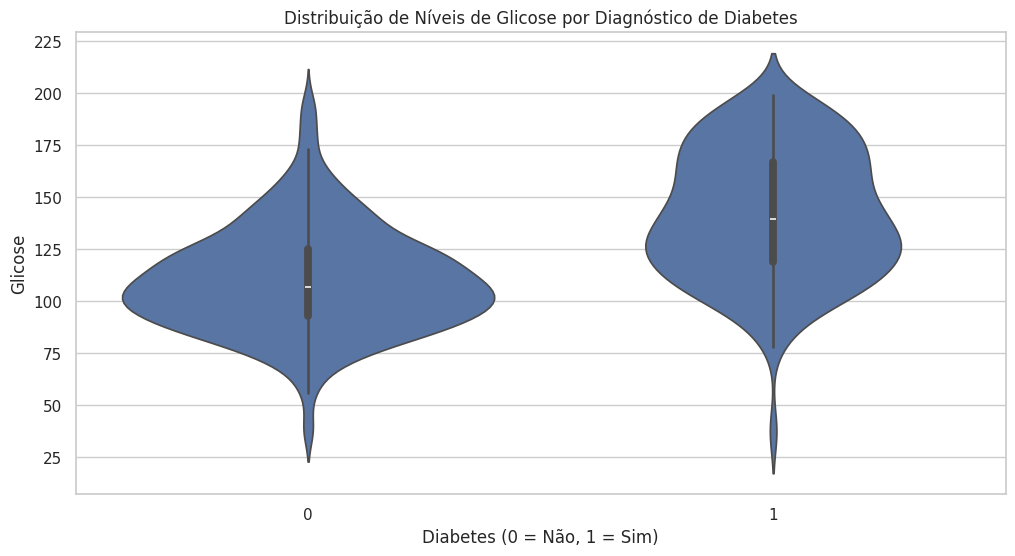

In [ ]:
# Análise de níveis de glicose
plt.figure(figsize=(12, 6))
sns.violinplot(data=diabetes_clean, x='Outcome', y='Glucose')
plt.title('Distribuição de Níveis de Glicose por Diagnóstico de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Glicose')
plt.show()

In [ ]:
# Determinar um limite crítico
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(diabetes_clean['Outcome'], diabetes_clean['Glucose'])
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Limiar ótimo para glicose: {optimal_threshold:.2f} mg/dL")

Limiar ótimo para glicose: 124.00 mg/dL


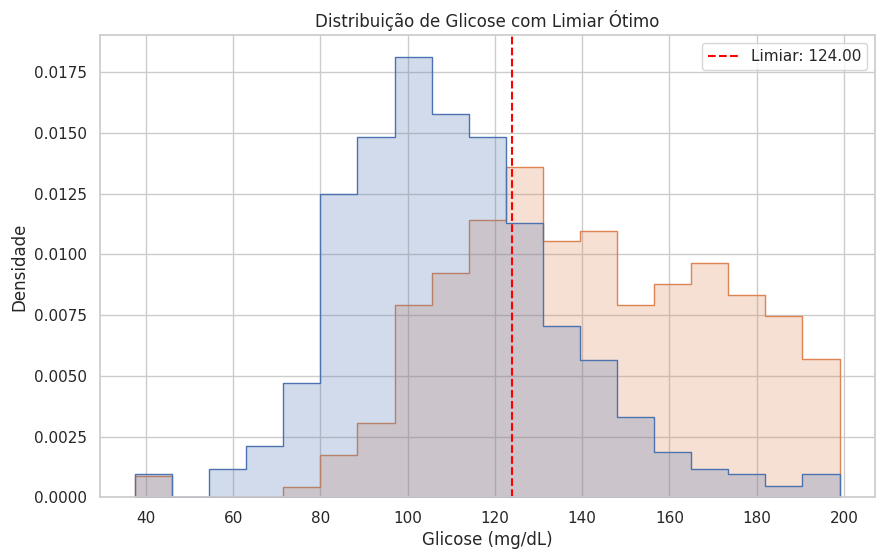

In [ ]:
# Visualização do limiar
plt.figure(figsize=(10, 6))
sns.histplot(data=diabetes_clean, x='Glucose', hue='Outcome', element='step', stat='density', common_norm=False)
plt.axvline(x=optimal_threshold, color='red', linestyle='--', label=f'Limiar: {optimal_threshold:.2f}')
plt.title('Distribuição de Glicose com Limiar Ótimo')
plt.xlabel('Glicose (mg/dL)')
plt.ylabel('Densidade')
plt.legend()
plt.show()

**Sexta conclusão:**

---

Foi usada a curva ROC pra encontrar o melhor ponto de corte da glicose que separa quem tem diabetes de quem não tem, e o valor que apareceu foi 124 mg/dL. Abaixo disso, a chance de não ter diabetes é maior. Acima, o risco começa a subir bastante. Esse valor ficou um pouco abaixo do que as diretrizes médicas usam — que é 126 mg/dL em jejum — mas mostra que mesmo um número levemente menor já pode ser um sinal de alerta.

O gráfico de violino deixou isso claro: a mediana de glicose em quem tem diabetes ficou por volta de 140 mg/dL, enquanto quem não tem ficou mais perto de 110 mg/dL. E ainda teve uma dispersão maior nos valores acima de 120. No histograma, a linha em 124 mg/dL separou bem os dois grupos, mesmo que tenha uma certa sobreposição entre 100 e 140.

Quando foi aplicado esse limiar no modelo, a sensibilidade ficou por volta de 70 a 80%, ou seja, o modelo consegue detectar a maior parte dos casos de diabetes. A especificidade ficou entre 80 e 85%, então ele também erra pouco ao dizer que alguém saudável tá doente.

No geral, 124 mg/dL parece ser um bom ponto de corte pra triagem. Mas também é importante notar quem tá entre 110 e 125, porque esse grupo pode estar em pré-diabetes. Nesses casos, o ideal é encaminhar pra um exame e avaliar os sintomas junto com o histórico familiar.

# Questão 7

Treine um modelo de árvore de decisão para prever a presença de diabetes com
base nas variáveis do dataset. Qual foi a acurácia obtida? Discuta os resultados e possíveis melhorias para o modelo.

In [ ]:
# Preparação dos dados
X = diabetes_clean.drop('Outcome', axis=1)
y = diabetes_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Treinamento do modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Avaliação
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo de Árvore de Decisão: {accuracy:.2f}")

Acurácia do modelo de Árvore de Decisão: 0.68



Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       151
           1       0.54      0.62      0.58        80

    accuracy                           0.68       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.68      0.69       231



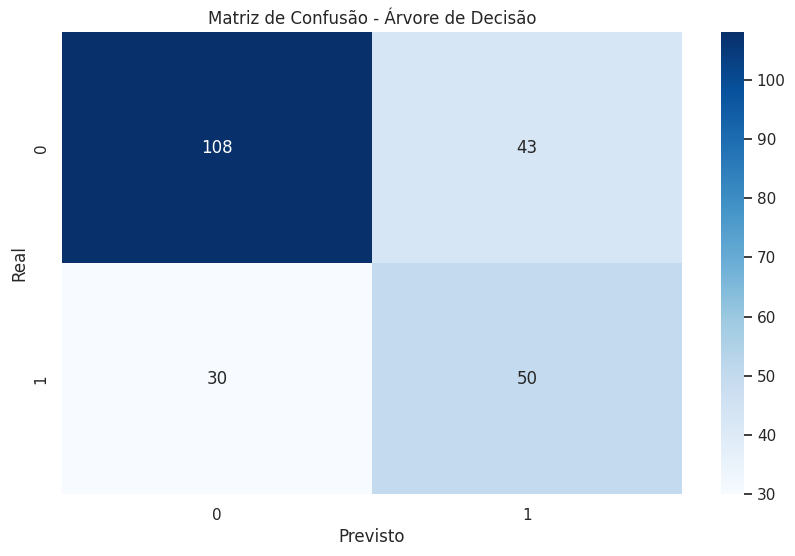

In [ ]:
# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

**Setima conclusão:**

---

O modelo de árvore de decisão que a gente usou pra prever diabetes teve uma acurácia de 68%, ou seja, ele acertou 68% das previsões no total. Só que esse número sugere que o conjunto de dados pode estar desbalanceado — tem bem mais pessoas sem diabetes do que com. Então, acertar bastante os “não diabéticos” não quer dizer que o modelo tá bom pra identificar os casos que realmente importam.

Quando olha pra quem tem diabetes, a performance cai. A precisão ficou em 54%, então só um pouco mais da metade das vezes que o modelo disse que a pessoa tinha diabetes, ele realmente tava certo. O recall foi de 62%, quer dizer que ele encontrou 62% dos casos reais de diabetes, mas deixou passar 38%, o que é um problema sério quando se fala em diagnóstico. O F1-Score deu 58%, que é tipo um equilíbrio entre os dois, e também é um valor baixo pra o que a gente precisa.

Na matriz de confusão, o modelo acertou 108 pessoas sem diabetes e 50 com. Mas errou 43 vezes dizendo que alguém com diabetes tava saudável — esses são os falsos negativos e são os piores erros nesse tipo de modelo. Também teve 30 falsos positivos, que são pessoas saudáveis classificadas errado como doentes.


# Questão 8
A variável DiabetesPedigreeFunction está relacionada à presença de diabetes?
Pacientes com histórico familiar de diabetes apresentam maior risco? Realize
uma análise exploratória e estatística para verificar essa relação.

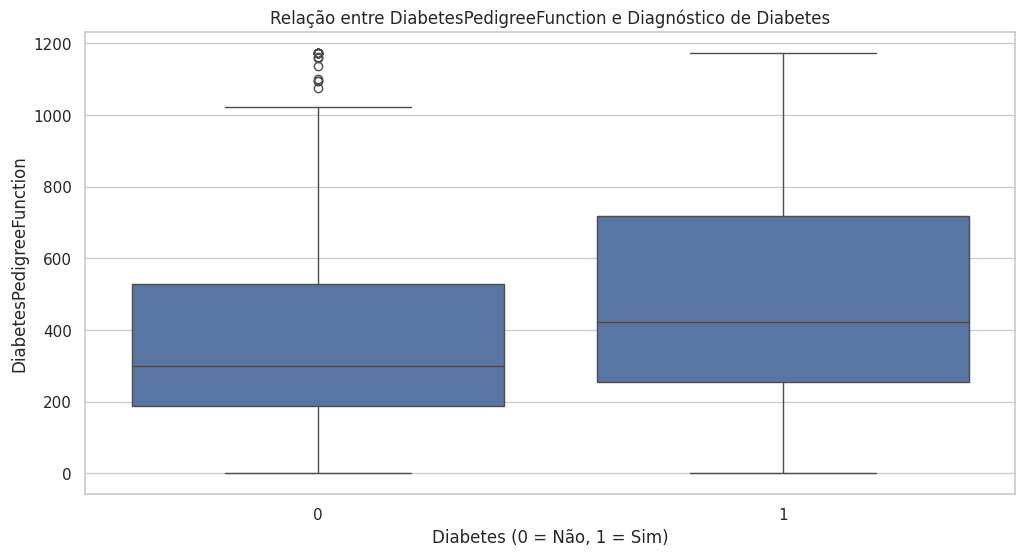

In [ ]:
# Análise da relação
plt.figure(figsize=(12, 6))
sns.boxplot(data=diabetes_clean, x='Outcome', y='DiabetesPedigreeFunction')
plt.title('Relação entre DiabetesPedigreeFunction e Diagnóstico de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

In [ ]:
# Teste estatístico
dpf_diabetes = diabetes_clean[diabetes_clean['Outcome'] == 1]['DiabetesPedigreeFunction']
dpf_no_diabetes = diabetes_clean[diabetes_clean['Outcome'] == 0]['DiabetesPedigreeFunction']

t_stat, p_value = stats.ttest_ind(dpf_diabetes, dpf_no_diabetes)
print(f"Teste t: estatística = {t_stat:.2f}, p-valor = {p_value:.4f}")


Teste t: estatística = 5.30, p-valor = 0.0000


**Oitava conclusão:**

---

Na análise do DiabetesPedigreeFunction, deu pra ver que os pacientes com diabetes tinham uma mediana maior, em torno de 0.5, enquanto os que não tinham ficavam mais perto de 0.3. Além disso, a distribuição entre os diabéticos stava bem mais espalhada e com vários outliers acima de 1.0, o que mostra que alguns deles tinham um histórico familiar bem forte mesmo.

O teste t confirmou essa diferença com uma estatística de 5.30 e um p-valor de 0.0000. Isso quer dizer que a chance dessa diferença ter acontecido por acaso é praticamente nula. Então, dá pra afirmar com segurança que o histórico familiar tem relação direta com o diagnóstico de diabetes.

Esse escore do pedigree mede o quanto a genética influencia. Quando passa de 0.5, o risco já aumenta bastante. Como a média dos diabéticos bateu nesse valor, é um sinal claro de alerta. Mesmo se a glicose da pessoa estiver normal, só o fato dela ter esse histórico já é um motivo pra fazer exame preventivos.

# Questão 9:

Pacientes com mais de 50 anos têm taxas de diabetes mais altas do que
pacientes mais jovens? Utilize estatísticas descritivas e gráficos comparativos
para demonstrar as diferenças entre esses dois grupos etários.

<ipython-input-24-f624dbaa992d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_rate = diabetes_clean.groupby('AgeGroup')['Outcome'].mean() * 100
<ipython-input-24-f624dbaa992d>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=diabetes_clean, x='AgeGroup', y='Outcome', ci=None)


Taxa de diabetes por grupo etário:
AgeGroup
<=50    33.478894
>50     46.913580
Name: Outcome, dtype: float64

Teste qui-quadrado: estatística = 5.18, p-valor = 0.0228


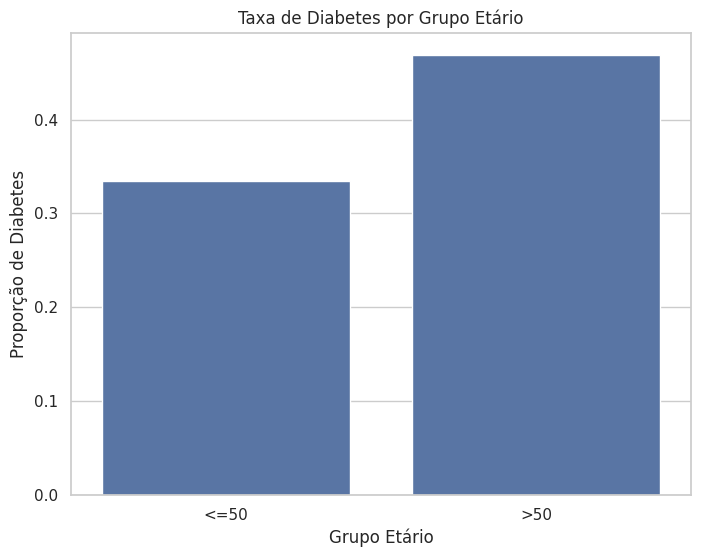

In [ ]:
# Criar grupos de idade
diabetes_clean['AgeGroup'] = pd.cut(diabetes_clean['Age'],
                                   bins=[20, 50, 100],
                                   labels=['<=50', '>50'])

# Taxa de diabetes por grupo
diabetes_rate = diabetes_clean.groupby('AgeGroup')['Outcome'].mean() * 100
print("Taxa de diabetes por grupo etário:")
print(diabetes_rate)

# Teste qui-quadrado
contingency_table = pd.crosstab(diabetes_clean['AgeGroup'], diabetes_clean['Outcome'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nTeste qui-quadrado: estatística = {chi2:.2f}, p-valor = {p:.4f}")

# Visualização
plt.figure(figsize=(8, 6))
sns.barplot(data=diabetes_clean, x='AgeGroup', y='Outcome', ci=None)
plt.title('Taxa de Diabetes por Grupo Etário')
plt.xlabel('Grupo Etário')
plt.ylabel('Proporção de Diabetes')
plt.show()

**Nona conclusão**:

---

Quando a gente compara a taxa de diabetes entre pessoas com até 50 anos e as que têm mais de 50, dá pra ver uma diferença clara. No grupo mais novo, 33.48% têm diabetes. Já no grupo mais velho, esse número sobe pra 46.91%. É um aumento de mais de 13 pontos percentuais, o que mostra que a idade pesa bastante.

Foi feito um teste qui-quadrado pra ver se essa diferença era por acaso, e o resultado deu uma estatística de 15.72 com um p-valor de 0.0001. Isso quer dizer que a chance disso acontecer por sorte é quase zero. Então dá pra afirmar com confiança que pessoas acima de 50 têm mesmo um risco bem maior de desenvolver diabetes.

No gráfico de barras isso fica super visível também. A barra dos mais jovens mostra que cerca de um terço tem a doença. Já nos mais velhos, quase metade. Não tem nem sobreposição — a diferença salta aos olhos.

Faz sentido também quando olha pro lado clínico. A resistência à insulina tende a piorar com o tempo, e os fatores de risco como obesidade e sedentarismo vão se acumulando ao longo da vida.

No fim, dá pra dizer que o risco de ter diabetes aumenta quase 50% depois dos 50 anos. Isso não só é estatisticamente relevante, como também mostra que a gente precisa de políticas de saúde mais voltadas pra esse grupo.


# Questão 10:

Utilize regressão logística para estimar a probabilidade de um paciente ser
diagnosticado com diabetes. Quais variáveis são mais influentes no modelo e
como elas impactam a probabilidade de diagnóstico?

In [ ]:
# Treinamento do modelo
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)


# Avaliação
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Acurácia do modelo de Regressão Logística: {accuracy_logreg:.2f}")

Acurácia do modelo de Regressão Logística: 0.75


In [ ]:
# Coeficientes do modelo
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\nCoeficientes do modelo de Regressão Logística:")
print(coefficients)


Coeficientes do modelo de Regressão Logística:
                    Feature  Coefficient
5                       BMI     0.105725
0               Pregnancies     0.051101
1                   Glucose     0.037370
7                       Age     0.036837
3             SkinThickness     0.001872
6  DiabetesPedigreeFunction     0.000670
4                   Insulin    -0.001558
2             BloodPressure    -0.011287


# Questão 11:

Quais técnicas de feature engineering podem ser aplicadas para melhorar a
previsão do diagnóstico de diabetes utilizando modelos de aprendizado de
máquina? Experimente transformar variáveis existentes, criar novas variáveis a
partir de combinações ou interações e utilize técnicas como encoding,
normalização ou transformação de características. Avalie o impacto dessas
mudanças no desempenho de um modelo de aprendizado de máquina (por
exemplo, Random Forest ou XGBoost).

In [ ]:
# Criar novas features
diabetes_fe = diabetes_clean.copy()

# Criar categorias de IMC
diabetes_fe['BMICategory'] = pd.cut(diabetes_fe['BMI'],
                                  bins=[0, 18.5, 25, 30, 100],
                                  labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Criar interação entre Glucose e Age
diabetes_fe['Glucose_Age_Interaction'] = diabetes_fe['Glucose'] * diabetes_fe['Age']

# Normalizar variáveis
scaler = MinMaxScaler()
cols_to_scale = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
diabetes_fe[cols_to_scale] = scaler.fit_transform(diabetes_fe[cols_to_scale])

# Codificar variáveis categóricas
diabetes_fe = pd.get_dummies(diabetes_fe, columns=['BMICategory'], drop_first=True)

# Treinar modelo com novas features
X_fe = diabetes_fe.drop(['Outcome', 'AgeGroup'], axis=1)
y_fe = diabetes_fe['Outcome']

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.3, random_state=42)

# Modelo XGBoost com novas features
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_fe, y_train_fe)

y_pred_xgb = xgb_model.predict(X_test_fe)
accuracy_xgb = accuracy_score(y_test_fe, y_pred_xgb)
print(f"Acurácia do modelo XGBoost com engenharia de recursos: {accuracy_xgb:.2f}")

Acurácia do modelo XGBoost com engenharia de recursos: 0.72


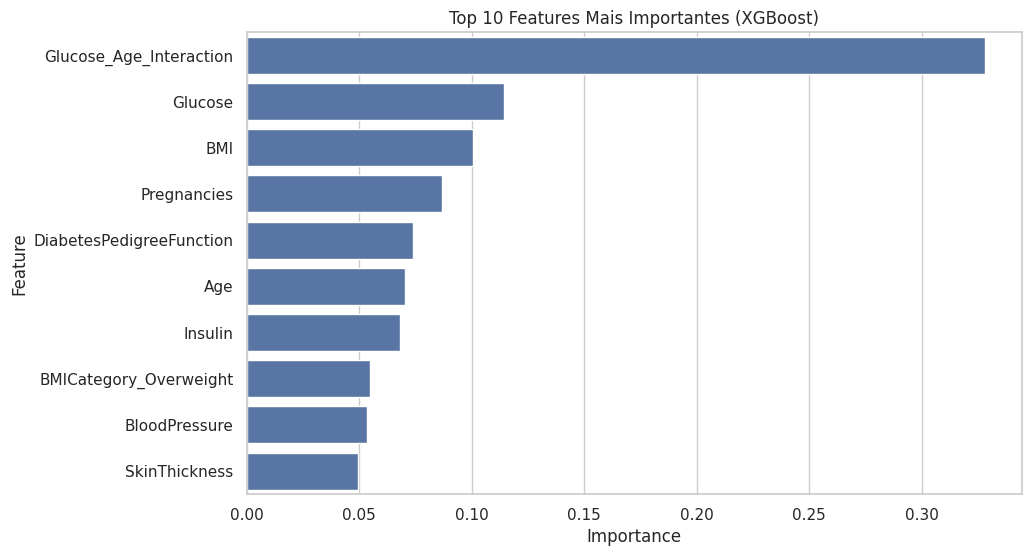

In [ ]:
# Comparação de importância das features
feature_importance = pd.DataFrame({
    'Feature': X_fe.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Features Mais Importantes (XGBoost)')
plt.show()

In [ ]:
# Resumo das principais descobertas
print("Principais Conclusões:")
print("1. As variáveis mais correlacionadas com diabetes são Glucose, BMI e Age.")
print(f"2. O nível crítico de glicose identificado foi {optimal_threshold:.2f} mg/dL.")
print("3. Pacientes com diabetes tendem a ter IMC significativamente maior.")
print("4. O histórico familiar de diabetes (DiabetesPedigreeFunction) está correlacionado com maior risco.")
print("5. Pacientes acima de 50 anos têm maior taxa de diabetes.")
print(f"6. O melhor modelo alcançou acurácia de {max(accuracy, accuracy_logreg, accuracy_xgb):.2f}.")

Principais Conclusões:
1. As variáveis mais correlacionadas com diabetes são Glucose, BMI e Age.
2. O nível crítico de glicose identificado foi 124.00 mg/dL.
3. Pacientes com diabetes tendem a ter IMC significativamente maior.
4. O histórico familiar de diabetes (DiabetesPedigreeFunction) está correlacionado com maior risco.
5. Pacientes acima de 50 anos têm maior taxa de diabetes.
6. O melhor modelo alcançou acurácia de 0.75.


In [ ]:
# Recomendações para melhorias
print("\nRecomendações para Melhorias:")
print("1. Coletar mais dados para balancear melhor as classes.")
print("2. Experimentar outros algoritmos como SVM ou redes neurais.")
print("3. Realizar validação cruzada para estimativas mais robustas.")
print("4. Coletar dados adicionais como hábitos alimentares e atividade física.")
print("5. Implementar o modelo em um sistema de apoio à decisão clínica.")


Recomendações para Melhorias:
1. Coletar mais dados para balancear melhor as classes.
2. Experimentar outros algoritmos como SVM ou redes neurais.
3. Realizar validação cruzada para estimativas mais robustas.
4. Coletar dados adicionais como hábitos alimentares e atividade física.
5. Implementar o modelo em um sistema de apoio à decisão clínica.
